###

In [463]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rebound as rb
import reboundx as rx

In [205]:
tup_num = 50
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)

Np = 15

Qex = []
tidal_lag = [2,3,4]
for x in tidal_lag:
    Q = 10**x
    Qex.append(Q)
Qex.append(np.inf)

tup_list = []

for Q in Qex:
    for e in e_b:
        for a in a_p:
            tup_list.append((Q,e,a,Np))

Ne = len(e_b)
Na = len(a_p)
Nq = len(Qex)

In [114]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

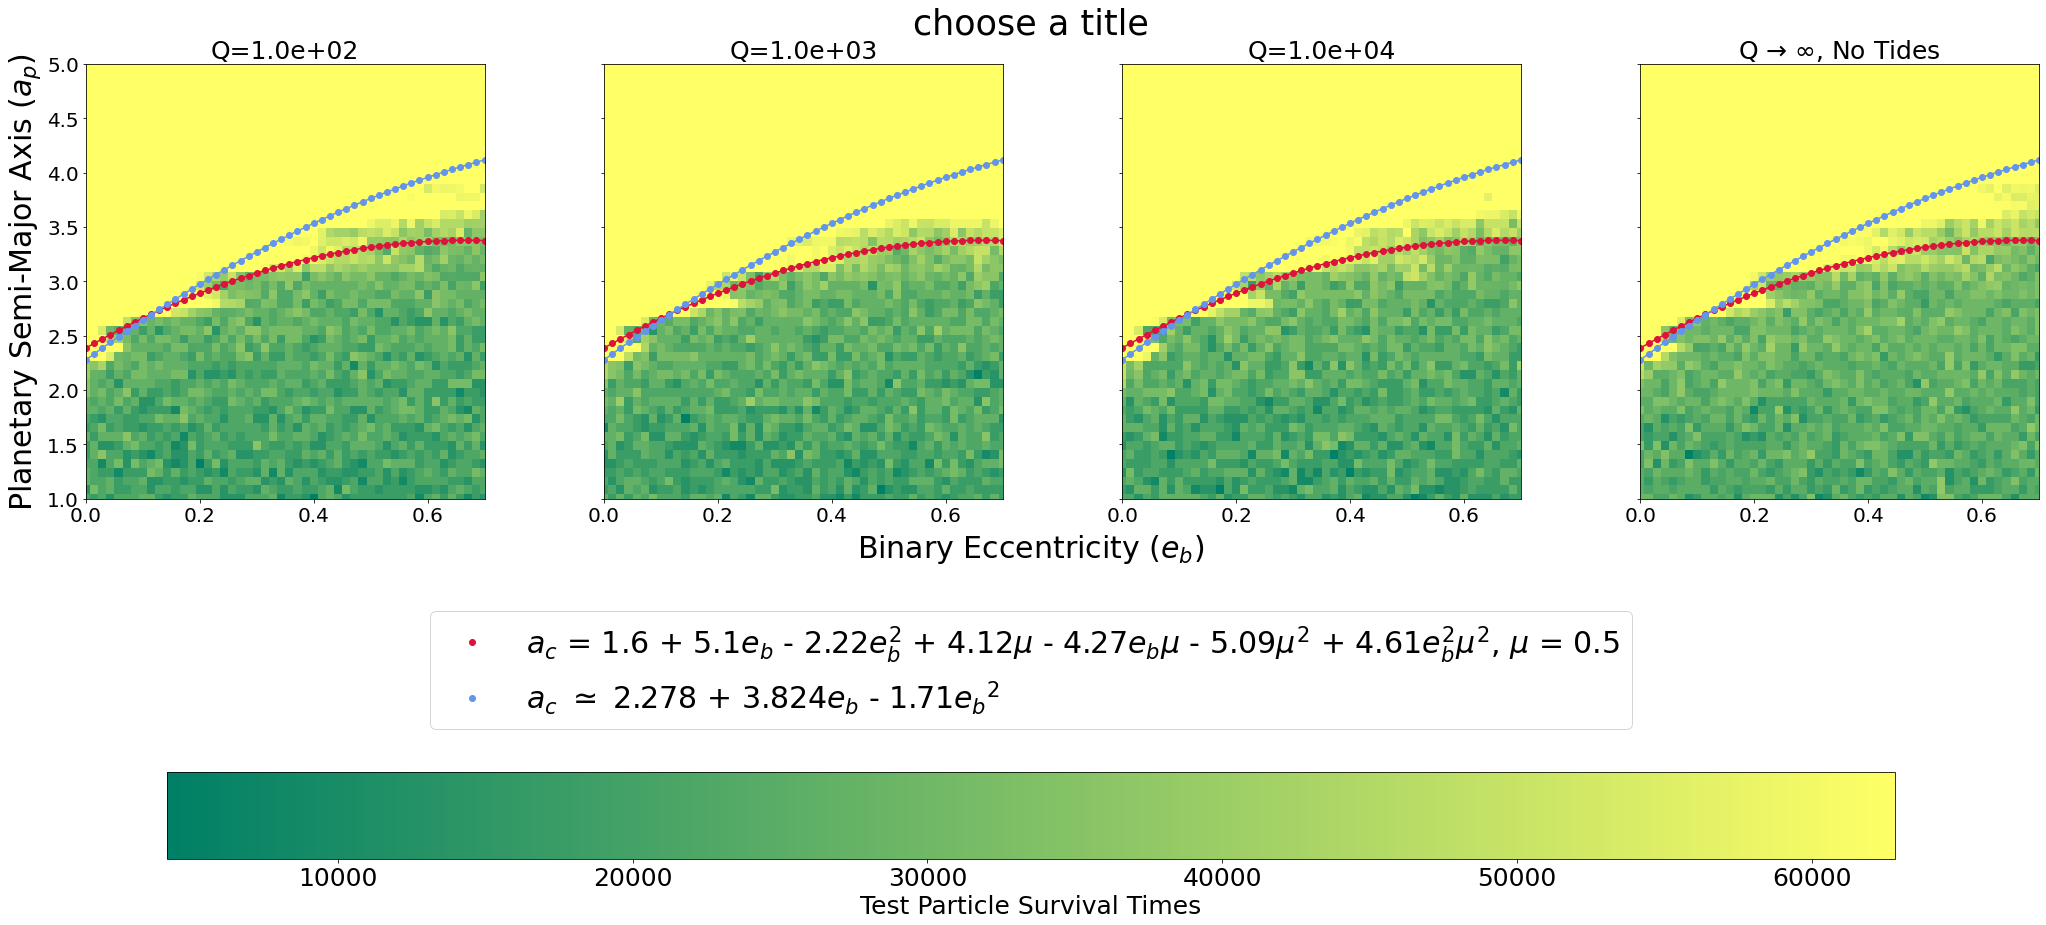

In [429]:
"""Finer Resolution Function, w/out longer simulation time"""

sunnyplot = np.loadtxt("CSTE_SUNNY_LONG_map_tup50plan15_Qs[inf, 100, 1000, 10000].npy")
fig, ax = plt.subplots(1, Nq, figsize=(35,8), sharey=True)#, constrained_layout=True)

ax = ax.ravel()
SurvTimeAll = np.reshape(sunnyplot, [Nq,Ne,Na])
SurvTimeArr = [SurvTimeAll[i,:,:] for i in range(Nq)]
colours = plt.colormaps["summer"] # cividis summer

for i in range(Nq):
    pcm = ax[i].pcolormesh(e_b, a_p, (SurvTimeArr[i].T), cmap=colours, shading='auto')
    
    a_b = 2.278 + 3.824*e_b - 1.71*(e_b**2) #blue
    a_c = 1.6 + 5.1*e_b + (- 2.22*(e_b**2)) + 4.12*0.5 + (- 4.27*e_b*0.5) + (- 5.09*(0.5**2)) 
    + 4.61*(e_b**2)*(0.5**2) #green

    ax[i].plot(e_b, a_c, "o", color="crimson",label="$a_{c}$ = 1.6 + 5.1$e_{b}$ - 2.22$e_{b}^{2}$ + 4.12$\mu$ - 4.27$e_{b}$$\mu$ - 5.09$\mu^{2}$ + 4.61$e_{b}^{2}$$\mu^{2}$, $\mu$ = 0.5")
    ax[i].plot(e_b, a_c, color='crimson')#,label="$a_{c}$ = 1.6 + 5.1$e_{b}$ - 2.22$e_{b}^{2}$ + 4.12$\mu$ - 4.27$e_{b}$$\mu$ - 5.09$\mu^{2}$ + 4.61$e_{b}^{2}$$\mu^{2}$")

    ax[i].plot(e_b, a_b, "o", color="cornflowerblue",label="$a_{c}$ $\simeq$ 2.278 + 3.824$e_{b}$ - 1.71${e_{b}}^{2}$")
    ax[i].plot(e_b, a_b, color='cornflowerblue')#,label="$a_{c} = $ 2.278 + 3.824$e_{b}$ - 1.71${e_{b}}^{2}$")
    
    if Qex[i] == np.inf:
        ax[i].set_title(r'Q $\to$ $\infty$, No Tides', size=25)
    else:
        ax[i].set_title('Q={:.1e}'.format(Qex[i]), size=25)
    ax[i].set_xlim(0.0,0.7)
    ax[i].set_ylim(1,5)
    ax[i].tick_params(axis="both",labelsize=20)
    #ax[i].legend(prop={"size":20},loc="lower center")

ax[0].set_ylabel('Planetary Semi-Major Axis ($a_{p}$)',fontsize=30)
fig.suptitle("choose a title", fontsize=35)
fig.supxlabel("Binary Eccentricity ($e_{b}$)", fontsize=30)
lines, labels = ax[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc="lower center", prop={"size":30}, bbox_to_anchor=(0,-0.3,1,1))

# creating invisible axis to plot colorbar    
axis = fig.add_axes([0,-0.5,1,1])
axis.set_visible(False)

cbar = plt.colorbar(pcm, ax=axis, location="bottom") 
cbar.set_label(label= 'Test Particle Survival Times', size=25) # CHANGE THIS NAME and change numbers on axis to be more easily undestood in terms of rebound time values
cbar.ax.tick_params(labelsize=25)

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)
# annotate stable and unstable regions
# MARTIN & fITZMAURICE fig 2 overplots resonances

#plt.savefig("colourmap_final.pdf", bbox_inches="tight") #REMEBER TO UPDATE BOTH PNG AND PDF FILES

In [182]:
# plot all critical semi's for each Q on top of one another

In [183]:
tup_num = 25 
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)

Np = 15

Qex = []
for x in range(4,7):
    Q = 10**x
    Qex.append(Q)

tup_list = []

for Q in Qex:
    for e in e_b:
        for a in a_p:
            tup_list.append((Q,e,a,Np))

Ne = len(e_b)
Na = len(a_p)
Nq = len(Qex)

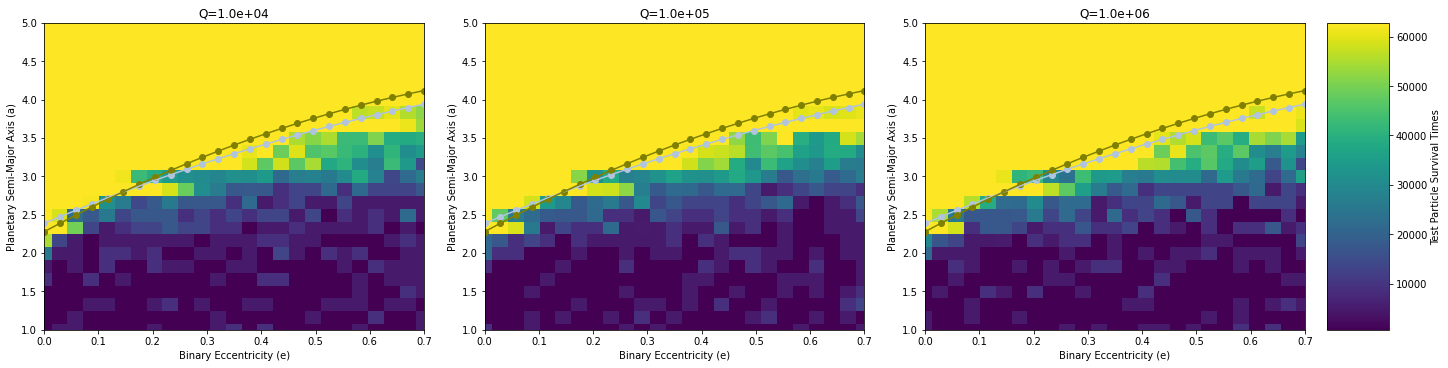

In [5]:
# turn this into a function if time permits
sunnyplot = np.loadtxt('SUNNY_map_tup25plan15_Qi10000_Qf1000000.npy')

fig, ax = plt.subplots(1, Nq, figsize=(20,5), constrained_layout=True)
ax = ax.ravel()

SurvTimeAll = np.reshape(sunnyplot, [Nq,Ne,Na])
       
SurvTimeArr = [SurvTimeAll[i,:,:] for i in range(Nq)]

for i in range(Nq):
    pcm = ax[i].pcolormesh(e_b, a_p, SurvTimeArr[i].T, shading='auto')
    
    a_b = 2.278 + 3.824*e_b - 1.71*(e_b**2) #blue
    a_c = 1.6 + 5.1*e_b + (- 2.22*(e_b**2)) + 4.12*0.5 + (- 4.27*e_b*0.5) + (- 5.09*(0.5**2)) + 4.61*(e_b**2)*(0.5**2) #green
    
    ax[i].plot(e_b, a_c, color='lightsteelblue')
    ax[i].scatter(e_b, a_c, color='lightsteelblue')

    ax[i].plot(e_b, a_b, color='olive')
    ax[i].scatter(e_b, a_b, color='olive')
    
    ax[i].set_title('Q={:.1e}'.format(Qex[i]))
    ax[i].set_xlabel('Binary Eccentricity (e)')
    ax[i].set_ylabel('Planetary Semi-Major Axis (a)')
    ax[i].set_xlim(0.0,0.7)
    ax[i].set_ylim(1,5)

plt.colorbar(pcm, location='right',label='Test Particle Survival Times') 

# below file was overwritten by obove plots, make sure to run this block again to have this plot
plt.savefig("colourmap_tides.png")

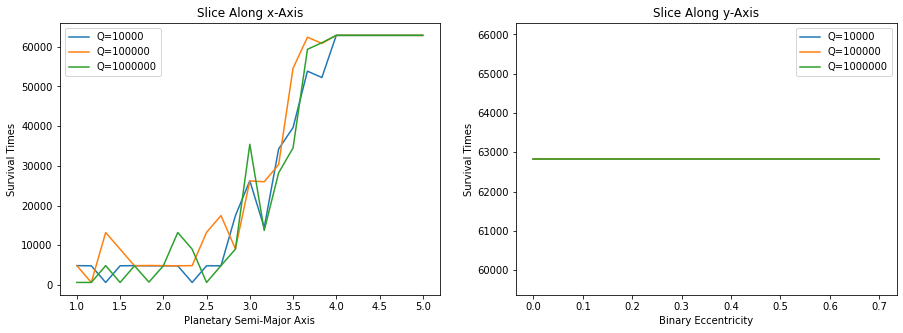

In [11]:
""" 1D slicing showing simulation the for binary eccentricity and planetary semi-major axis values at point of 
ejection from simulation """

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for i in range(Nq):
    semi = SurvTimeArr[i][-1,:]
    ax1.plot(a_p, semi, label=f"Q={Qex[i]}")
    ax1.set_xlabel("Planetary Semi-Major Axis") #initial binary eccentricity
    ax1.set_ylabel("Survival Times")
    ax1.set_title("Slice Along x-Axis")
    ax1.legend()

    e =  SurvTimeArr[i][:,-1]
    ax2.plot(e_b, e, label=f"Q={Qex[i]}")
    ax2.set_xlabel("Binary Eccentricity") #initialy planetary semi major axis
    ax2.set_ylabel("Survival Times")
    ax2.set_title("Slice Along y-Axis")
    ax2.legend()
plt.savefig("1d_slicing.png")

In [14]:
sa = None

sa = rx.SimulationArchive('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin', 
                           rebxfilename='xarchive.bin')

print("Number of snapshots: %d" % len(sa))

# figure out how to access the Hash names, may be useful 